###Task 1: Data Understanding and Visualization

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


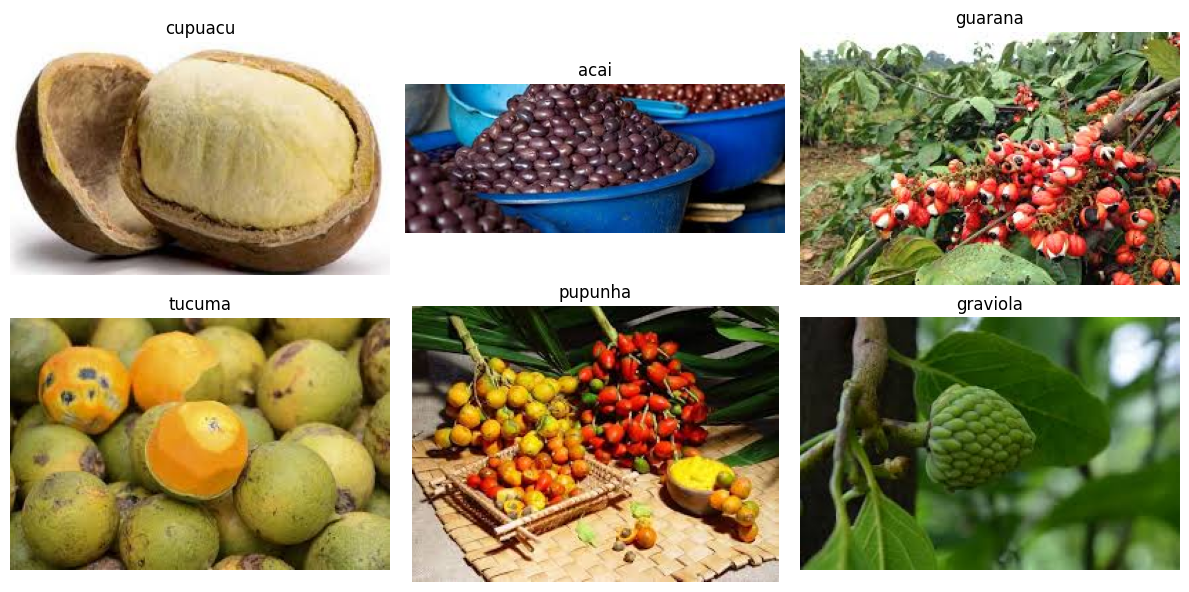

In [2]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the train dataset
train_dir = "/content/drive/MyDrive/AI and Machine Learning/FruitinAmazon/train"

# Get the list of class directions
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Get the list of class directories
class_dirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]

# Select one random image from each class
selected_images = []
labels = []

for class_dir in class_dirs:
    class_path = os.path.join(train_dir, class_dir)
    images = [img for img in os.listdir(class_path) if img.endswith(('.png', '.jpg', '.jpeg'))]
    if images:
        selected_image = random.choice(images)
        selected_images.append(os.path.join(class_path, selected_image))
        labels.append(class_dir)

# Display images in a grid with two rows
num_images = len(selected_images)
cols = num_images // 2 + num_images % 2  # Ensure we have two rows
rows = 2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))

# Flatten axes for easy iteration if necessary
axes = axes.flatten()

for i, img_path in enumerate(selected_images):
    img = mpimg.imread(img_path)
    axes[i].imshow(img)
    axes[i].set_title(labels[i])
    axes[i].axis('off')

# Hide any extra subplot spaces if class count is odd
for i in range(len(selected_images), len(axes)):
    axes[i].axis('off')

plt.tight_layout()
plt.show()


###Task 2: Loading and Preprocessing Image Data in keras

In [3]:
import tensorflow as tf

# Define the dataset
train_dir = "/content/drive/MyDrive/AI and Machine Learning/FruitinAmazon/train"

# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

# Create a preprocessing layer for normalization
rescale = tf.keras.layers.Rescaling(1./255)  # Normalize pixel values to [0,1]

# Load training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",  # Use folder names as labels
    label_mode="int",  # Encode labels as integers
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset="training",
    seed=123  # Ensures the same split each time
)

# Apply normalization to training dataset
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred",
    label_mode="int",
    image_size=(img_height, img_width),
    interpolation="nearest",
    batch_size=batch_size,
    shuffle=False,  # No need to shuffle validation data
    validation_split=validation_split,
    subset="validation",
    seed=123
)

# Apply normalization to validation dataset
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Display dataset structure
print(f"Training dataset: {train_ds}")
print(f"Validation dataset: {val_ds}")


Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Training dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
Validation dataset: <_MapDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


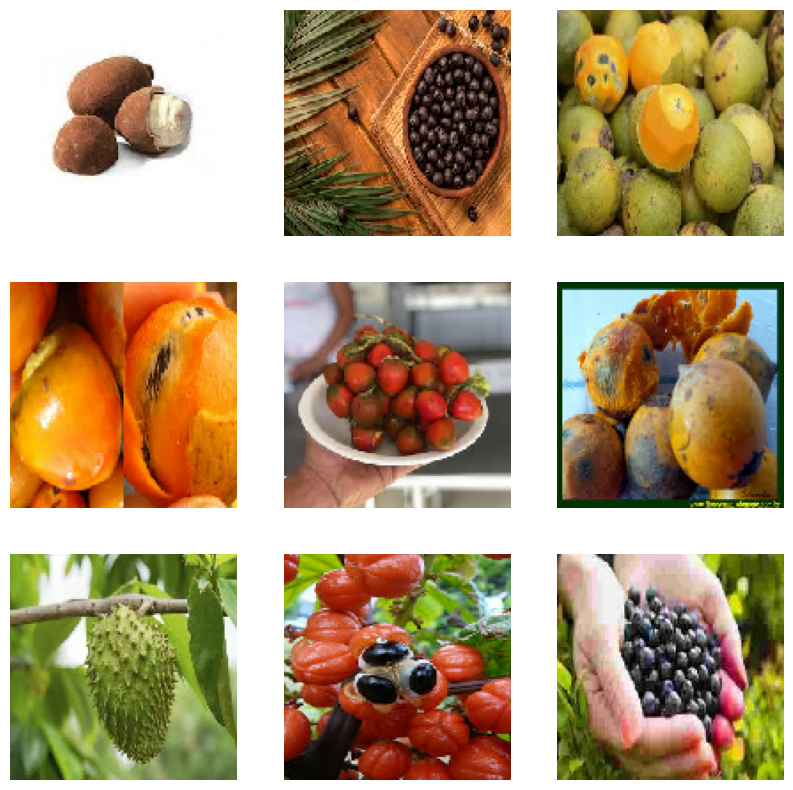

In [4]:
import matplotlib.pyplot as plt

# Get a batch of images and labels from train_ds
image_batch, label_batch = next(iter(train_ds))

# Plot some images
plt.figure(figsize=(10, 10))
for i in range(9):  # Display 9 images
    plt.subplot(3, 3, i + 1)  # Indented properly
    plt.imshow(image_batch[i].numpy())  # Convert tensor to numpy
    plt.axis("off")  # Hide axis

plt.show()  # Show the images


###Task 3 - Implement a CNN

In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_cnn(input_shape, num_classes):
  model = models.Sequential()

  # Convolutional Layer 1
  model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu', input_shape=input_shape))
  # Pooling Layer 1
  model.add(layers.MaxPooling2D((2, 2), strides=2))

  # Convolutional Layer 2
  model.add(layers.Conv2D(32, (3, 3), padding='same', strides=1, activation='relu'))
  # Pooling Layer 2
  model.add(layers.MaxPooling2D((2, 2), strides=2))

  # Flatten Layer
  model.add(layers.Flatten())

  # Fully Connected Layers
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(128, activation='relu'))

  # Output Layer
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model


# Change input_shape to match the image size used in the dataset
input_shape = (128, 128, 3)
num_classes = 10
model = build_cnn(input_shape, num_classes)
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

###Task 4: Compile the Model

In [7]:
import tensorflow as tf
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Step 1: Compile the Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


###Task 4: Train the Model

In [8]:
# Define callbacks
checkpoint_callback = ModelCheckpoint(
    'best_model.h5',           # Save model as 'best_model.h5' when improved
    monitor='val_loss',        # Monitor validation loss
    save_best_only=True,       # Save the best model (the one with lowest validation loss)
    verbose=1,                 # Show output when saving
    mode='min'                 # Minimize the validation loss
)

early_stopping_callback = EarlyStopping(
    monitor='val_loss',        # Monitor validation loss for early stopping
    patience=10,               # Stop training if no improvement for 10 epochs
    restore_best_weights=True, # Restore the weights of the best model
    verbose=1                  # Show output when stopping
)

# Step 2: Train the Model
history = model.fit(
    train_ds,                  # Training dataset
    epochs=250,                # Number of epochs
    batch_size=16,             # Batch size
    validation_data=val_ds,    # Validation dataset
    callbacks=[checkpoint_callback, early_stopping_callback],  # Callbacks
    verbose=1                  # Show progress during training
)


Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.0341 - loss: 2.4109
Epoch 1: val_loss improved from inf to 1.62757, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.0395 - loss: 2.4301 - val_accuracy: 0.2778 - val_loss: 1.6276
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.3322 - loss: 1.9218
Epoch 2: val_loss did not improve from 1.62757
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 467ms/step - accuracy: 0.3186 - loss: 1.9164 - val_accuracy: 0.6111 - val_loss: 1.7298
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 658ms/step - accuracy: 0.5799 - loss: 1.7718
Epoch 3: val_loss did not improve from 1.62757
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 806ms/step - accuracy: 0.5807 - loss: 1.7669 - val_accuracy: 0.0556 - val_loss: 2.0807
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.3756 - loss: 1.5387
Epoch 4: val_loss did not improve from 1.62757
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 519ms/step - accuracy: 0.3720 - loss: 1.5339 - val_accuracy: 0.2778 - val_loss: 1.7199
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.5966 - loss: 1.2755
Epoch 5: val_loss improved from 1.62757 to 1.03275, saving mod

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 504ms/step - accuracy: 0.6176 - loss: 1.2559 - val_accuracy: 0.5000 - val_loss: 1.0327
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.7517 - loss: 0.9469
Epoch 6: val_loss did not improve from 1.03275
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 525ms/step - accuracy: 0.7409 - loss: 0.9623 - val_accuracy: 0.5000 - val_loss: 1.4496
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - accuracy: 0.7407 - loss: 0.8779
Epoch 7: val_loss improved from 1.03275 to 0.98963, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 575ms/step - accuracy: 0.7361 - loss: 0.8840 - val_accuracy: 0.5556 - val_loss: 0.9896
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 359ms/step - accuracy: 0.8594 - loss: 0.6282
Epoch 8: val_loss improved from 0.98963 to 0.41968, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 508ms/step - accuracy: 0.8633 - loss: 0.6197 - val_accuracy: 0.9444 - val_loss: 0.4197
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 641ms/step - accuracy: 0.8744 - loss: 0.4605
Epoch 9: val_loss did not improve from 0.41968
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 815ms/step - accuracy: 0.8780 - loss: 0.4580 - val_accuracy: 0.6667 - val_loss: 1.0295
Epoch 10/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 0.9497 - loss: 0.2929
Epoch 10: val_loss did not improve from 0.41968
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 537ms/step - accuracy: 0.9518 - loss: 0.2916 - val_accuracy: 0.8333 - val_loss: 0.5253
Epoch 11/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9398 - loss: 0.2400
Epoch 11: val_loss did not improve from 0.41968
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 474ms/step - accuracy: 0.9410 - loss: 0.2419 - val_accuracy: 0.7778 - val_loss: 0.5862
Epoch 12/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 384ms/step - accuracy: 0.9699 - loss: 0.1566
Epoch 12: val_loss did not improve from 0.41968
3/3 ━━

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 505ms/step - accuracy: 1.0000 - loss: 0.0762 - val_accuracy: 0.8889 - val_loss: 0.3983
Epoch 14/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 619ms/step - accuracy: 0.9797 - loss: 0.1164
Epoch 14: val_loss did not improve from 0.39834
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 796ms/step - accuracy: 0.9813 - loss: 0.1116 - val_accuracy: 0.7778 - val_loss: 0.4570
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - accuracy: 0.9803 - loss: 0.0557
Epoch 15: val_loss did not improve from 0.39834
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 456ms/step - accuracy: 0.9783 - loss: 0.0575 - val_accuracy: 0.8889 - val_loss: 0.5673
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 1.0000 - loss: 0.0512
Epoch 16: val_loss did not improve from 0.39834
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 540ms/step - accuracy: 1.0000 - loss: 0.0498 - val_accuracy: 0.8333 - val_loss: 0.5683
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 387ms/step - accuracy: 1.0000 - loss: 0.0185
Epoch 17: val_loss did not improve from 0.39834
3/3 

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 596ms/step - accuracy: 1.0000 - loss: 0.0106 - val_accuracy: 0.8333 - val_loss: 0.3900
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 652ms/step - accuracy: 1.0000 - loss: 0.0083
Epoch 19: val_loss improved from 0.39000 to 0.30963, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 894ms/step - accuracy: 1.0000 - loss: 0.0080 - val_accuracy: 0.8889 - val_loss: 0.3096
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 1.0000 - loss: 0.0044
Epoch 20: val_loss improved from 0.30963 to 0.30768, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 594ms/step - accuracy: 1.0000 - loss: 0.0043 - val_accuracy: 0.8889 - val_loss: 0.3077
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step - accuracy: 1.0000 - loss: 0.0034
Epoch 21: val_loss improved from 0.30768 to 0.27664, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 506ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.8889 - val_loss: 0.2766
Epoch 22/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step - accuracy: 1.0000 - loss: 0.0023
Epoch 22: val_loss improved from 0.27664 to 0.23654, saving model to best_model.h5


3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 516ms/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 0.8889 - val_loss: 0.2365
Epoch 23/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step - accuracy: 1.0000 - loss: 0.0016
Epoch 23: val_loss did not improve from 0.23654
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 475ms/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9444 - val_loss: 0.2433
Epoch 24/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 1.0000 - loss: 0.0017
Epoch 24: val_loss did not improve from 0.23654
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 570ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8889 - val_loss: 0.2517
Epoch 25/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 638ms/step - accuracy: 1.0000 - loss: 9.7975e-04
Epoch 25: val_loss did not improve from 0.23654
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 814ms/step - accuracy: 1.0000 - loss: 0.0010 - val_accuracy: 0.8889 - val_loss: 0.2715
Epoch 26/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step - accuracy: 1.0000 - loss: 9.2241e-04
Epoch 26: val_loss did not improve from 0.23

###Task 5: Evaluate the Model

In [9]:
# Evaluate the model on the validation dataset
val_loss, val_accuracy = model.evaluate(val_ds)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.8889 - loss: 0.2365
Validation Loss: 0.23654086887836456
Validation Accuracy: 0.8888888955116272


###Task 6: Save the Model

In [10]:
# Save the trained model to an .h5 file
model.save('/content/best_model.h5')
print("Model saved to /content/best_model.h5 ")

Model saved to /content/best_model.h5 


###Task 6: Load the Model

In [11]:
# Load the saved model
loaded_model = tf.keras.models.load_model('/content/best_model.h5')
print("Model loaded successfully")

# Re-evaluate the model on the validation/test set
test_loss, test_accuracy = loaded_model.evaluate(val_ds)
print(f"Re-evaluated Test Loss: {test_loss}")
print(f"Re-evaluated Test Accuracy: {test_accuracy}")


Model loaded successfully
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step - accuracy: 0.8889 - loss: 0.2365
Re-evaluated Test Loss: 0.23654086887836456
Re-evaluated Test Accuracy: 0.8888888955116272


###Task 7: Predictions and Classification Report

In [12]:
from collections import Counter
import numpy as np
from sklearn.metrics import classification_report

# Check the class distribution in the validation dataset
y_true = np.concatenate([y for x, y in val_ds], axis=0)
print(Counter(y_true))  # This will print the number of samples per class

# Get predictions on the validation dataset
y_pred = model.predict(val_ds)
y_pred_labels = np.argmax(y_pred, axis=-1)

# Generate the Classification Report with zero_division to handle ill-defined metrics
report = classification_report(y_true, y_pred_labels, zero_division=0)
print(report)


Counter({np.int32(5): 15, np.int32(4): 3})
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           4       1.00      0.67      0.80         3
           5       0.93      0.93      0.93        15

    accuracy                           0.89        18
   macro avg       0.64      0.53      0.58        18
weighted avg       0.94      0.89      0.91        18

